In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=5000, centers=2, 
                  cluster_std=[6, 4], n_features=2, 
                  random_state=42)

In [21]:
n_samples = len(X)
n_samples

5000

In [22]:
import numpy as np

r1 = np.random.randint(low=-100, high=100, 
                       size=(n_samples,)).astype(int)
r2 = np.random.randint(low=-100, high=100, 
                       size=(n_samples,)).astype(int)

In [23]:
import pandas as pd

all_dataset = pd.DataFrame(
    dict(label=y, a=X[:,0], b=X[:,1], c=r1, d=r2))

print(all_dataset)

      label         a          b   c   d
0         0 -0.498849  10.911222 -38  34
1         0  7.387688  15.437949  51  -1
2         1  1.073705   2.251987  82  46
3         1  4.203785   2.110671  -2  74
4         1  7.425170   3.088369  -1  42
...     ...       ...        ...  ..  ..
4995      0 -3.868102   3.257651 -54  52
4996      0 -3.057595   8.529015  15  17
4997      0  0.084380  11.834551  85  65
4998      1  4.585866  -2.453762   0 -16
4999      0  5.888370   0.961520  37 -22

[5000 rows x 5 columns]


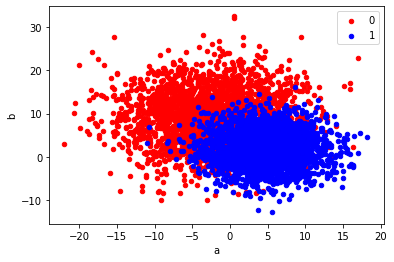

In [24]:
from matplotlib import pyplot

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = all_dataset.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='a', y='b', label=key, color=colors[key])
    
pyplot.show()

In [25]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(all_dataset, 
                                   test_size=0.2, 
                                   random_state=0)

training, validation = train_test_split(train_val, 
                                        test_size=0.25, 
                                        random_state=0)

In [26]:
!mkdir -p tmp

In [27]:
s3_bucket_name = "sagemaker-cookbook-bucket"
prefix = "chapter06/input"

In [28]:
training.to_csv('tmp/training_data.csv', header=True, index=False)
validation.to_csv('tmp/validation_data.csv', header=True, index=False)
test.to_csv('tmp/test_data.csv', header=True, index=False)

In [29]:
!aws s3 cp tmp/training_data.csv s3://{s3_bucket_name}/{prefix}/training_data.csv
!aws s3 cp tmp/validation_data.csv s3://{s3_bucket_name}/{prefix}/validation_data.csv
!aws s3 cp tmp/test_data.csv s3://{s3_bucket_name}/{prefix}/test_data.csv

upload: tmp/training_data.csv to s3://sagemaker-cookbook-bucket/chapter06/input/training_data.csv
upload: tmp/validation_data.csv to s3://sagemaker-cookbook-bucket/chapter06/input/validation_data.csv
upload: tmp/test_data.csv to s3://sagemaker-cookbook-bucket/chapter06/input/test_data.csv


In [30]:
!aws s3 cp tmp/training_data_no_header.csv s3://{s3_bucket_name}/{prefix}/training_data_no_header.csv
!aws s3 cp tmp/validation_data_no_header.csv s3://{s3_bucket_name}/{prefix}/validation_data_no_header.csv
!aws s3 cp tmp/test_data_no_header.csv s3://{s3_bucket_name}/{prefix}/test_data_no_header.csv

upload: tmp/training_data_no_header.csv to s3://sagemaker-cookbook-bucket/chapter06/input/training_data_no_header.csv
upload: tmp/validation_data_no_header.csv to s3://sagemaker-cookbook-bucket/chapter06/input/validation_data_no_header.csv
upload: tmp/test_data_no_header.csv to s3://sagemaker-cookbook-bucket/chapter06/input/test_data_no_header.csv


In [31]:
%store s3_bucket_name
%store prefix

Stored 's3_bucket_name' (str)
Stored 'prefix' (str)
